In [4]:
import illustris_python as il
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import astropy.stats as astats
plt.rcParams['figure.facecolor'] = 'w'


basePath = '/Users/TaraD/TNG-300_1/output' #Folder with snapshots and group catalogs
snapshot_ind = 66

# Loading header file
header = il.groupcat.loadHeader(basePath, snapshot_ind)
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("Header File Keys: ")
print('\n'.join(list(header.keys())))

# Loading halo group quantities 
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("\nHalo Group File Keys: ")
print('\n'.join(list(halo_grp.keys())))

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
print("\nSubHalo Group File Keys: ")
print('\n'.join(list(subhalo_grp.keys())))

Header File Keys: 
Ngroups_ThisFile
Nsubgroups_ThisFile
Nids_ThisFile
Ngroups_Total
Nsubgroups_Total
Nids_Total
NumFiles
Time
Redshift
HubbleParam
BoxSize
Omega0
OmegaLambda
FlagDoubleprecision
Git_commit
Git_date

Halo Group File Keys: 
count
GroupBHMass
GroupBHMdot
GroupCM
GroupFirstSub
GroupGasMetalFractions
GroupGasMetallicity
GroupLen
GroupLenType
GroupMass
GroupMassType
GroupNsubs
GroupPos
GroupSFR
GroupStarMetalFractions
GroupStarMetallicity
GroupVel
GroupWindMass
Group_M_Crit200
Group_M_Crit500
Group_M_Mean200
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit500
Group_R_Mean200
Group_R_TopHat200

SubHalo Group File Keys: 
count
SubhaloBHMass
SubhaloBHMdot
SubhaloCM
SubhaloFlag
SubhaloGasMetalFractions
SubhaloGasMetalFractionsHalfRad
SubhaloGasMetalFractionsMaxRad
SubhaloGasMetalFractionsSfr
SubhaloGasMetalFractionsSfrWeighted
SubhaloGasMetallicity
SubhaloGasMetallicityHalfRad
SubhaloGasMetallicityMaxRad
SubhaloGasMetallicitySfr
SubhaloGasMetallicitySfrWeighted
SubhaloGrNr
SubhaloH

18767465
[87453.625 57760.027 56635.2   48978.547 40328.406 36715.758 31760.066
 31613.166 31110.195 30706.139 30121.426 29552.848 29994.932 27343.611
 25908.443 25923.64  24286.85  24397.488 22562.018 21426.482]
2686
[87453.625 57760.027 56635.2   48978.547 40328.406 36715.758 31760.066
 31613.166 31110.195 30706.139 30121.426 29552.848 29994.932 27343.611
 25908.443 25923.64  24286.85  24397.488 22562.018 21426.482]


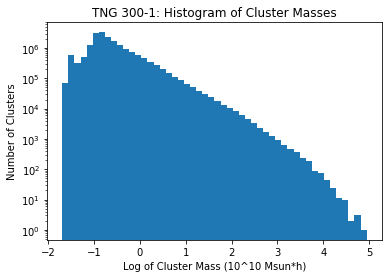

Count of subhalos: 15904796
Number of Total groups in Snapshot: 18767465
Number of Total subgroups in Snapshot: 15904796


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Halos with subhalos: 12952011
Halos with more than 5 subhalos: 88076


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[

Subhalos not flagged and with DM mass > 10^11: 15594
Number of halos with mass > 10^13 Msun: 100


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Number of halos with mass > 10^13 Msun: 100


Text(0, 0.5, 'Number of Clusters (Log Scaled)')

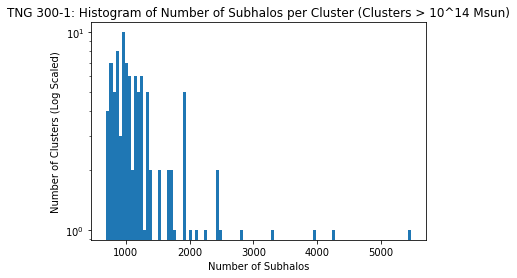

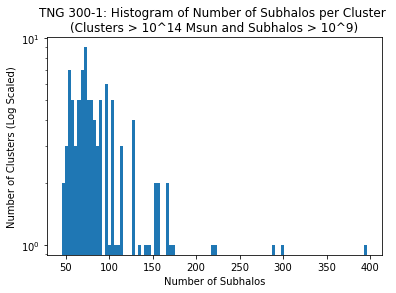

In [6]:
print(halo_grp['count'])
Cluster_masses = halo_grp['GroupMass']

print(Cluster_masses[:20])
cluster_mass_mask = (Cluster_masses >= (10**3))
print(len((Cluster_masses)[cluster_mass_mask]))
print(((Cluster_masses)[cluster_mass_mask])[:20])
plt.hist((np.log10(Cluster_masses)), bins=50)#bins=[0,100])
plt.title('TNG 300-1: Histogram of Cluster Masses')
plt.xlabel('Log of Cluster Mass (10^10 Msun*h)')
plt.ylabel('Number of Clusters')
plt.yscale('log')
plt.show()

print("Count of subhalos:",subhalo_grp['count'])
print("Number of Total groups in Snapshot:", header['Ngroups_Total'])
print("Number of Total subgroups in Snapshot:", header['Nsubgroups_Total'])
grp_first_sub = halo_grp['GroupFirstSub']
mask = [grp_first_sub != -1]
print("Halos with subhalos:",len(grp_first_sub[mask]))
print("Halos with more than 5 subhalos:", len(halo_grp['GroupNsubs'][halo_grp['GroupNsubs']>5]))
mask_flag = [subhalo_grp['SubhaloFlag'] == True]
subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
mask_mass = [subhalomass>11]
print("Subhalos not flagged and with DM mass > 10^11:", len((subhalo_grp['SubhaloFlag'])[mask_flag and mask_mass]))
mask_halomass = [(halo_grp['GroupMass'])>=(10**4)]
print("Number of halos with mass > 10^13 Msun:", len(halo_grp['GroupMass'][mask_halomass]))

#Histogram of number of subhalos
plt.figure()
x = (halo_grp['GroupNsubs'])[mask_halomass]#[halo_grp['GroupNsubs']>0]
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist((x), bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300-1: Histogram of Number of Subhalos per Cluster (Clusters > 10^14 Msun)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')

# SUBHALO MASS CUTS AND HISTOGRAM OF SUBHALSO PER CLUSTER
#mask_halomass = ((halo_grp['GroupMass'])>=((10**3)))#&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^13 Msun:", Number_of_halos)
halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]
halo_subhalos = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]
mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    #print("\nHalo:", h_i)
    #print("Halo # of Subhalos:", halo_grp['GroupNsubs'][h_i])
    #print("Halo Mass:", halo_grp['GroupMass'][h_i])
    #print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
    iFS = halo_grp['GroupFirstSub'][h_i]
    #print(subhalo_grp['SubhaloGrNr'][iFS]) #635-783 is halo  in subhalo catalog
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    #print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)/0.704))
    mask = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > (10**9))    #mask = [subhalo_grp['SubhaloFlag']==True]
    subhalos = len(subhalo_grp['SubhaloGrNr'][mask])
    halo_subhalos.append(subhalos)
halo_subhalos = np.array(halo_subhalos)

plt.figure()
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist(halo_subhalos, bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300-1: Histogram of Number of Subhalos per Cluster \n(Clusters > 10^14 Msun and Subhalos > 10^9)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')


In [8]:
def basic_sub_cuts(subhalos, field):
    
    #subhalos = subhalos[field][subhalos['SubhaloFlag']]
    #subhalos = subhalos[subhalos['SubhaloMass']!=0]
    #subhalos = subhalos[subhalos['SubhaloMassType'][:,4]!=0]
    mask1 = subhalos['SubhaloStellarPhotometrics']<8e+36
    photo_mask = mask1[:,0]
    for i in range (1,8):
        photo_mask = photo_mask & mask1[:,i]
    #subhalos = subhalos[photo_mask]
    mask = (subhalos['SubhaloFlag'])&(subhalos['SubhaloMass']!=0)&(subhalos['SubhaloMassType'][:,4]!=0)&(photo_mask)
    return subhalos[field][mask]
#print(len(subhalo_grp[]))
def Bootstrap_Covariance(NDensity_list, Nb, R):
    halo_array2 = np.arange(0,len(NDensity_list))
    halo_boot = astats.bootstrap(halo_array2, bootnum=300, samples=None)
    resampled_list = []
    for b in range(0,300):
        mask_b = (np.array(halo_boot[b].astype(int)))
        resampled_profile = np.mean((np.array(NDensity_list))[mask_b], axis=0)
        resampled_list.append(resampled_profile)
    resampled_array = np.array(resampled_list)
    Yi = resampled_array
    Yi_avg = np.mean(Yi, axis=0)
    Yi_avg_array = np.tile(Yi_avg, (Nb,1))
    minus_array = Yi - Yi_avg_array
    Yi_cov = np.zeros((R,R))
    for i in range(R):
        for j in range(R):
            Yi_cov[i,j] = (1./(Nb-1.))*(np.sum(minus_array[:,i]*minus_array[:,j]))
    boot_err = np.sqrt(np.diag(Yi_cov))
    return Yi_avg, Yi_cov, boot_err
#SAVITSKY GOLAY LOG DERIVATIVE:
#Functions to get log slope
import scipy.signal as signal
import scipy.interpolate as interpolate

def get_slope_sg(xx, yy, num_output):
    # Savitsky-Golay smoothing                                                                                                                                        
    window_size = 9
    poly_order = 5
    yy_filtered = signal.savgol_filter(np.log(yy), window_size, poly_order)
    # fit spline                                                                                                                                                      
    yy_spline = interpolate.interp1d(np.log(xx), yy_filtered, kind = 'cubic')
    #Evaluate spline on very fine grid                                                                                                                                
    numsmooth = 1000
    lnxx_fine = np.linspace(np.log(np.min(xx)), np.log(np.max(xx)), num = numsmooth)
    lnyy_fine = yy_spline(lnxx_fine)
    yy_fine = np.exp(lnyy_fine)
    #Calculate derivative using finite differences                                                                                                                    
    dlny_dlnx_fine = (lnyy_fine[1:] - lnyy_fine[:-1])/(lnxx_fine[1:] - lnxx_fine[:-1])
    #Interpolate derivative onto desired array                                                                                                                        
    interp_func = interpolate.interp1d(lnxx_fine[:-1], dlny_dlnx_fine)
    lnxx_out = np.linspace(np.min(lnxx_fine[:-1]), np.max(lnxx_fine[:-1]), num = num_output)
    dlny_dlnx_out = interp_func(lnxx_out)
    return np.exp(lnxx_out), dlny_dlnx_out, yy_fine, np.exp(lnxx_fine)

## Color Plots, Histograms, etc

In [9]:
plt.rcParams['figure.facecolor'] = 'w'
import matplotlib.gridspec as gridspec

#BASIC CUTS APPLIED TO SUBHALOS
mag = basic_sub_cuts(subhalo_grp,'SubhaloStellarPhotometrics')

# SUBHALO MASS MASKING
mass = basic_sub_cuts(subhalo_grp,'SubhaloMassType') #previously SubhaloMassInHalfRad (no type specification or index chosen)
mass2 = basic_sub_cuts(subhalo_grp,'SubhaloMassInHalfRad') 
print(np.shape(mass))
subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
subhalomass2 = np.array(np.log10(mass2*1e10/0.704))
#mask = ((subhalo_grp['SubhaloMassInHalfRad'][:,4]*1e10)>(10**9.5))
mask = subhalomass>9 #previouslt it was >9.5
mask2 = subhalomass2>9.5
#basic_cuts(subhalo_grp, 'Subhalo')
print("Subhalos with total halfradmass >9.5:",len(mag[mask2]))
print("Subhalos with stellar mass > 9:", len(mag[mask]))
group_numbers = basic_sub_cuts(subhalo_grp,'SubhaloGrNr')
sub_pos = basic_sub_cuts(subhalo_grp, 'SubhaloCM')
mag = mag[mask]

# CLUSTER MASS MASKING
w = (group_numbers[mask])
cluster_mass = []
for h_i in group_numbers[mask]:
    cluster_mass.append(halo_grp["GroupMass"][h_i]*1e10/.704)
cluster_mass = np.array(cluster_mass)
cluster_mass_mask = (cluster_mass > (5*(10**13)))

(2292785, 6)


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Subhalos with total halfradmass >9.5: 912807
Subhalos with stellar mass > 9: 268208


In [10]:
plt.rcParams['figure.facecolor'] = 'w'
import matplotlib.gridspec as gridspec

#BASIC CUTS APPLIED TO SUBHALOS
mag = basic_sub_cuts(subhalo_grp,'SubhaloStellarPhotometrics')

# SUBHALO MASS MASKING
mass = basic_sub_cuts(subhalo_grp,'SubhaloMassType') #previously SubhaloMassInHalfRad (no type specification or index chosen)
mass2 = basic_sub_cuts(subhalo_grp,'SubhaloMassInHalfRad') 
print(np.shape(mass))
subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
subhalomass2 = np.array(np.log10(mass2*1e10/0.704))
#mask = ((subhalo_grp['SubhaloMassInHalfRad'][:,4]*1e10)>(10**9.5))
mask = subhalomass>9 #previouslt it was >9.5
mask2 = subhalomass2>9.5
#basic_cuts(subhalo_grp, 'Subhalo')
print("Subhalos with total halfradmass >9.5:",len(mag[mask2]))
print("Subhalos with stellar mass > 9:", len(mag[mask]))
group_numbers = basic_sub_cuts(subhalo_grp,'SubhaloGrNr')
sub_pos = basic_sub_cuts(subhalo_grp, 'SubhaloCM')
mag = mag[mask]

# CLUSTER MASS MASKING
w = (group_numbers[mask])
cluster_mass = []
for h_i in group_numbers[mask]:
    cluster_mass.append(halo_grp["GroupMass"][h_i]*1e10/.704)
cluster_mass = np.array(cluster_mass)
cluster_mass_mask = (cluster_mass > (5*(10**13)))

# WITHIN 1 MPC MASKING (OPTIONAL)
chosen_subs_group_numbers = group_numbers[mask][cluster_mass_mask]
dist_list = []
scale_factor = header['Time']
for i in range(len(chosen_subs_group_numbers)):
    h_i = chosen_subs_group_numbers[i]
    dev = (sub_pos[mask][cluster_mass_mask])[i] - halo_grp['GroupCM'][h_i]
    dist = np.linalg.norm(dev)*.001*scale_factor/.704
    dist_list.append(dist)
dist_array = np.array(dist_list)
#print(dist_array)

dist_list2 = []
all_subs_group_numbers = group_numbers[mask]
for i in range(len(all_subs_group_numbers)):
    h_i = all_subs_group_numbers[i]
    dev2 = (sub_pos[mask])[i] - halo_grp['GroupCM'][h_i]
    dist2 = np.linalg.norm(dev2)*.001*scale_factor/.704
    dist_list2.append(dist2)
dist_array2 = np.array(dist_list2)

(2292785, 6)


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Subhalos with total halfradmass >9.5: 912807
Subhalos with stellar mass > 9: 268208


In [11]:
stellar_mass = subhalomass[mask]
stellar_mass_cl = stellar_mass[cluster_mass_mask]

#G-R, R-Z MAGNITUDE ARRAYS MASKED FOR SUBHALO SELECTION
mag1 = mag[cluster_mass_mask]
mag2 = mag1[dist_array <= 2.]
mag3 = mag1[dist_array > 2.]
mag4 = mag[dist_array2 > 2.]
#mag = mag[(group_numbers < 1154)&(mask)]
g_minus_r = mag[:,4]-mag[:,5]
r_minus_z = mag[:,5]-mag[:,7]
g_minus_r_cl = mag1[:,4]-mag1[:,5]
r_minus_z_cl = mag1[:,5]-mag1[:,7]
g_minus_r_cl2 = mag2[:,4]-mag2[:,5]
r_minus_z_cl2 = mag2[:,5]-mag2[:,7]
g_minus_r_f = mag3[:,4]-mag3[:,5]
r_minus_z_f = mag3[:,5]-mag3[:,7]
g_minus_r_f2 = mag4[:,4]-mag4[:,5]
r_minus_z_f2 = mag4[:,5]-mag4[:,7]
print("mag lengths:",len(mag), len(mag1), len(mag2), len(mag3), len(mag4))
#print(group_numbers[mask][-100:])
#print(w[-1000:])
#print(cluster_mass)
    
# COLOR-CUTS
b1 = .25
b2 = .59
r1 = .61
r2 = .73

mag lengths: 268208 24706 24066 640 810


4.354838709677419
24066 810


NameError: name 'fig' is not defined

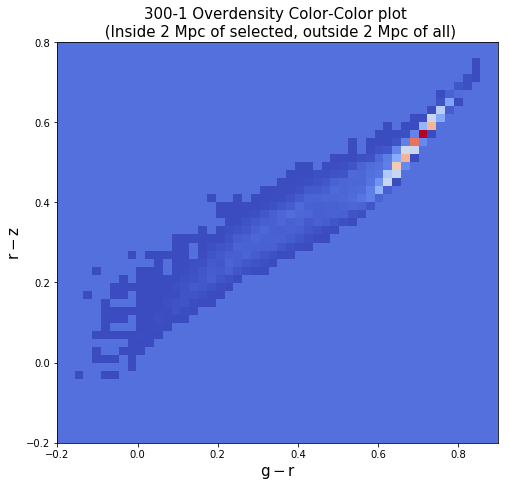

In [14]:
# COLOR-MASS PLOT
# RANGE OPTIONS
#range_hist = [[0, 0.8], [0, 0.8]] #old
range_hist = [[-.2, .9], [-.2, .8]]
#range_hist = [[.5, 0.9], [.2, 0.8]]

gmr = g_minus_r_cl
rmz = r_minus_z_cl

# NUMPY HISTOGRAM WITH IMSHOW FOR OVERDENSITY PLOTS
fig1 = plt.figure(figsize = (20,15))
gs1 = gridspec.GridSpec(10,12)
ax1 = plt.subplot(gs1[3:8, 5:10])  
ax1.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax1.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
ax1.set_title("300-1 Overdensity Color-Color plot \n (Inside 2 Mpc of selected, outside 2 Mpc of all)", fontsize = 15) #   (Subhalos in Selected Clusters)

#h, x, y = np.histogram2d(g_minus_r, r_minus_z, bins = 50, range=range_hist)
h_f, x_f, y_f = np.histogram2d(g_minus_r_f2, r_minus_z_f2, bins = 50, range=range_hist, weights = None)
#h_ND = h/(.007*.008)
#avg = np.mean(h)
avg = np.average(h_f, weights = (h_f > 0))
h_cl2, x_cl2, y_cl2 = np.histogram2d(g_minus_r_cl2, r_minus_z_cl2, bins = 50, range=range_hist, weights = None)
#h_ND_cl = h_cl/(.007*.008)
print(avg)
overdens = np.zeros(np.shape(h_cl2.T))
for i in range(len(h_cl2.T[:,0])):
    for j in range(len(h_cl2.T[0,:])):
        if h_cl2.T[i,j] == 0:
            overdens[i,j] = 0
        else:
            overdens[i,j] = (h_cl2.T[i,j]/len(g_minus_r_cl2)) - (avg/len(g_minus_r_f2)) #/len(g_minus_r_f) #
#overdens = h_cl2.T - avg
print(len(g_minus_r_cl2), len(g_minus_r_f2))
H2 = ax1.imshow(overdens, origin='lower', extent=[-.2, 0.9,-.2, 0.8], cmap = 'coolwarm')
fig.colorbar(H2, ax=ax1)

# COLOR-COLOR PLOT SPECIFICATIONS (CHANGE DEPENDING ON WHETHER 1D HIST INCLUDED OR NOT)
fig = plt.figure(figsize = (20,15))
gs = gridspec.GridSpec(10,12)
ax0 = plt.subplot(gs[3:8, 5:10])  
axx = plt.subplot(gs[8:10, 5:10], sharex=ax0)  ##
axx.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax0.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
if np.shape(gmr) == np.shape(g_minus_r):
    ax0.set_title("300-1 Color-Color plot", fontsize = 15) #   (Subhalos in Selected Clusters)
elif np.shape(gmr) == np.shape(g_minus_r_cl):
    ax0.set_title("300-1 Color-Color plot (Subhalos in Selected Clusters)", fontsize = 15) #   
elif np.shape(gmr) == np.shape(g_minus_r_cl2):
    ax0.set_title("300-1 Color-Color plot (Subhalos within 1 Mpc of Selected Clusters)", fontsize = 15) #   

#ax0.plot([b1,b1],np.linspace(0,0.8,2), c = 'b', label = b1, linewidth=1) #left blue bound
#ax0.plot([b2,b2],np.linspace(0,0.8,2), c = 'b', label = b2, linewidth=1)
#ax0.plot([r1,r1],np.linspace(0,0.8,2), c = 'r', label = r1, linewidth=1)
#ax0.plot([r2,r2],np.linspace(0,0.8,2), c = 'r', label = r2, linewidth=1)
ax0.legend()
fig.tight_layout()





# 2D AND 1D MATPLOTLIB HISTOGRAMS

h_cl, x_cl, y_cl = np.histogram2d(gmr, rmz, bins = 100, range=range_hist)
H = ax0.hist2d(gmr, rmz , bins = 200, cmap='viridis', range=range_hist, weights=None, cmin = .1, cmax = None)#range=[[0.4, 0.7], [0.5, 0.8]])
h_cl200, x_cl200, y_cl200 = np.histogram2d(gmr, rmz, bins = 200, range=range_hist)
 
#H = ax0.imshow(h_cl200.T, origin='lower', extent=[0, 0.8,0, 0.8], cmap = 'viridis')
#ax0.contour(H[0].T, extent = [H[1][0], H[1][-1], H[2][0], H[2][-1]], linewidths=3, cmap = 'viridis') #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
level_list = [2,30,60,99,100]#[1,15,30,49]
ax0.contour(h_cl.T, extent = [x_cl[0], x_cl[-1], y_cl[0], y_cl[-1]], linewidths=1, cmap = 'autumn', levels = level_list) #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
axx.hist(gmr, bins = H[1], range = [-.2,0.9])
plt.show()
#[1,15,30,49] extent = [x_cl[0], x_cl[-1], y_cl[0], y_cl[-1]]
#fig.colorbar(H[3], ax=ax0)

# OLDER SCATTER PLOTS AND CONTOUR CODES ETC
#plt.scatter(g_minus_r, r_minus_z, s = .5)
#levels = np.linspace(0.2, 100,num=6)
#heights, gmr, rmz = np.histogram2d(g_minus_r,r_minus_z,bins=100)
#ax.contour(gmr[:100], rmz[:100], heights, levels=levels) #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
#ax.scatter(r_minus_z, g_minus_r, s=1)



# COLOR-MASS PLOT

plt.figure()
plt.hist2d(stellar_mass, g_minus_r, bins = 100, cmap = 'viridis', range=[[9, 12], [-.1, .9]], cmin=.01)
#plt.scatter(stellar_mass, g_minus_r)
plt.plot([9,12], [.55,.55], c = 'w')
plt.plot([10.2,10.2], [.55,.9], c = 'w')
#plt.plot(stellar_mass, (stellar_mass*0.054)+.05, c = 'w')
#plt.colorbar()
plt.xlabel("$\mathrm{Stellar Mass [Log Msun]}$", fontsize = 20)
plt.ylabel("$\mathrm{g-r}$", fontsize = 20)
plt.title("Color-Mass Plane plot", fontsize = 20) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()




## Color Splitting Profiles

Number of halos with mass > 10^14 Msun: 559
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

N Subhalos after first masking: 2084
N Subhalos after total masking: 153
len of all, blue, red: 153 38 44 71
R500c, R200c, R200m: 0.5962877718168602 0.8789393258933192 1.0832641163495382
galaxies [1, 2, 0, 2, 4, 1, 8, 6, 7, 8, 11, 8, 10, 7, 10, 11, 6, 5, 13, 6, 11, 1, 6, 0, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 0, 4, 2, 4, 2, 2, 2, 3, 1, 3, 0, 5, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 3, 0, 3, 1, 1, 4, 3, 4, 1, 2, 0, 6, 1, 0, 6, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 2, 0, 1, 1, 0, 5, 3, 5, 3, 6, 4, 5, 3, 6, 3, 3, 3, 4, 4, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 145

Halo: 10
Halo Mass: 30121.426
N Subhalos: 1684
N Subhalos after first masking: 1679
N Subhalos after total masking: 151
len of all, blue, red: 151 19 45 87
R500c, R200c, R200m: 0.5949337266014821 0.8930961484609122 1.0910091012492074
galaxies [1, 1, 7, 6, 3, 6, 5, 2, 5, 8, 5, 5, 11, 10, 8, 16, 7, 15, 4, 5, 4, 3, 1, 2, 2, 0, 0, 0, 0, 0]
blue galax

N Subhalos after first masking: 1905
N Subhalos after total masking: 111
len of all, blue, red: 111 43 21 46
R500c, R200c, R200m: 0.3859845166291631 0.5961379628997073 0.7614576677666569
galaxies [0, 0, 1, 0, 1, 3, 1, 2, 2, 3, 2, 2, 0, 0, 1, 2, 5, 12, 4, 9, 7, 5, 9, 3, 2, 3, 11, 11, 7, 2]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 5, 2, 6, 1, 3, 4, 1, 0, 1, 7, 2, 3, 2]
red galaxies counted [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 1, 0, 2, 2, 0, 1, 1, 1, 0, 3, 1, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 4, 3, 1, 3, 4, 0, 5, 1, 1, 1, 4, 6, 3, 0]
sum of galaxies: 110

Halo: 22
Halo Mass: 20983.459
N Subhalos: 1514
N Subhalos after first masking: 1507
N Subhalos after total masking: 104
len of all, blue, red: 104 29 22 53
R500c, R200c, R200m: 0.4878136250493363 0.7551455158827285 0.940224784722325
galaxies [0, 1, 2, 2, 2, 0, 5, 2, 2, 2, 3, 5, 3, 5, 8, 10, 9, 6, 11, 4, 4, 4, 1, 3, 0, 2, 0, 1, 0, 0]
blue galaxies co

N Subhalos after total masking: 108
len of all, blue, red: 108 36 28 44
R500c, R200c, R200m: 0.3685475113202541 0.5917288486632567 0.7387652599530732
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 3, 4, 3, 3, 3, 7, 3, 8, 14, 15, 18, 13, 7, 1, 1]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 0, 2, 3, 0, 4, 7, 4, 3, 3, 1, 1]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 5, 4, 4, 7, 2, 1, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 3, 4, 0, 3, 6, 4, 7, 8, 3, 0, 0]
sum of galaxies: 108

Halo: 34
Halo Mass: 16846.766
N Subhalos: 1203
N Subhalos after first masking: 1187
N Subhalos after total masking: 91
len of all, blue, red: 91 23 17 51
R500c, R200c, R200m: 0.2652465563114473 0.4380927180250786 0.6004946320048191
galaxies [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 4, 4, 2, 1, 2, 1, 2, 1, 2, 10, 5, 13, 10, 7, 11]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0

N Subhalos after first masking: 1135
N Subhalos after total masking: 82
len of all, blue, red: 82 19 22 40
R500c, R200c, R200m: 0.4273328987279976 0.6585129593236665 0.8233019274683564
galaxies [1, 0, 0, 0, 2, 1, 3, 3, 2, 5, 5, 2, 3, 6, 5, 7, 7, 5, 9, 4, 3, 4, 2, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 3, 1, 1, 3, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 0, 2, 2, 1, 1, 1, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 2, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 4, 3, 3, 4, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 81

Halo: 46
Halo Mass: 14551.992
N Subhalos: 1044
N Subhalos after first masking: 1023
N Subhalos after total masking: 89
len of all, blue, red: 89 22 22 45
R500c, R200c, R200m: 0.44943243635074304 0.702010991290626 0.8500623960268822
galaxies [2, 0, 1, 0, 2, 4, 1, 1, 3, 6, 4, 4, 5, 7, 9, 3, 9, 13, 0, 3, 4, 1, 0, 0, 4, 0, 0, 0, 0, 0]
blue galaxies counted [0

N Subhalos after first masking: 858
N Subhalos after total masking: 86
len of all, blue, red: 86 20 22 44
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
galaxies [2, 2, 0, 2, 1, 2, 4, 1, 8, 2, 4, 1, 3, 5, 5, 4, 1, 3, 6, 5, 3, 5, 2, 5, 1, 3, 1, 1, 1, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 1, 0, 3, 1, 1, 0, 1, 1, 0]
red galaxies counted [1, 0, 0, 0, 1, 1, 0, 0, 4, 0, 1, 0, 1, 0, 0, 0, 1, 1, 4, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0]
red galaxies counted [1, 2, 0, 2, 0, 1, 4, 1, 2, 2, 3, 0, 1, 4, 3, 3, 0, 1, 1, 3, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0]
sum of galaxies: 83

Halo: 58
Halo Mass: 13182.956
N Subhalos: 965
N Subhalos after first masking: 956
N Subhalos after total masking: 98
len of all, blue, red: 98 25 13 60
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 5, 5, 16, 8, 11, 8, 5, 5, 12, 5, 7, 5, 3, 0, 0, 0, 0]
blue galaxies counted [0, 

N Subhalos after first masking: 957
N Subhalos after total masking: 59
len of all, blue, red: 59 19 16 24
R500c, R200c, R200m: 0.35397525125044416 0.5804813296791751 0.7596806185377467
galaxies [0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 3, 5, 1, 4, 3, 4, 5, 7, 4, 6, 3, 3, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 0, 3, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 3, 0, 3, 1, 0, 3, 3, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 58

Halo: 70
Halo Mass: 12261.962
N Subhalos: 1030
N Subhalos after first masking: 1016
N Subhalos after total masking: 71
len of all, blue, red: 71 27 12 32
R500c, R200c, R200m: 0.3723632749524496 0.6190568456048823 0.7651054468407622
galaxies [0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 8, 4, 4, 6, 2, 5, 3, 2, 4, 2, 2, 8, 5, 1, 2, 2, 0, 0, 0, 0]
blue galaxies counted [0,

N Subhalos after first masking: 939
N Subhalos after total masking: 66
len of all, blue, red: 66 25 13 28
R500c, R200c, R200m: 0.3222296327514448 0.5805903434903475 0.7313154090291526
galaxies [0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 5, 4, 4, 7, 6, 3, 1, 1, 9, 2, 1, 4, 4, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 5, 2, 1, 1, 7, 1, 1, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 1, 3, 4, 4, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0]
sum of galaxies: 66

Halo: 82
Halo Mass: 10597.636
N Subhalos: 766
N Subhalos after first masking: 753
N Subhalos after total masking: 65
len of all, blue, red: 65 22 16 27
R500c, R200c, R200m: 0.3803419009105111 0.5842685887819711 0.7219066723980457
galaxies [0, 0, 0, 0, 2, 1, 0, 1, 3, 4, 0, 3, 2, 3, 1, 6, 9, 3, 8, 3, 1, 2, 4, 8, 0, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0,

N Subhalos after total masking: 57
len of all, blue, red: 57 12 12 33
R500c, R200c, R200m: 0.4012219491090465 0.6205032903341002 0.7695008292603813
galaxies [1, 1, 2, 0, 2, 3, 1, 3, 2, 0, 2, 4, 3, 5, 7, 1, 4, 5, 8, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 3, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 5, 1, 2, 2, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 55

Halo: 94
Halo Mass: 10289.019
N Subhalos: 856
N Subhalos after first masking: 843
N Subhalos after total masking: 56
len of all, blue, red: 56 28 13 15
R500c, R200c, R200m: 0.3173017320764785 0.5507157951293802 0.6841214365430489
galaxies [0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 6, 8, 4, 7, 6, 4, 1, 1, 11, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0

N Subhalos after first masking: 791
N Subhalos after total masking: 62
len of all, blue, red: 62 16 12 34
R500c, R200c, R200m: 0.3609313572852022 0.5742569733471751 0.7234636922820409
galaxies [2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 4, 4, 2, 9, 7, 5, 0, 5, 2, 3, 1, 0, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 4, 0, 0, 3, 0, 1, 0, 0, 2, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 3, 1, 2, 1, 1, 5, 2, 4, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 106
Halo Mass: 9582.273
N Subhalos: 627
N Subhalos after first masking: 623
N Subhalos after total masking: 40
len of all, blue, red: 40 14 9 17
R500c, R200c, R200m: 0.409483058156213 0.6119061321018505 0.7454023314445947
galaxies [0, 1, 0, 0, 1, 1, 1, 4, 1, 2, 2, 5, 2, 4, 3, 1, 4, 2, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0

N Subhalos after first masking: 687
N Subhalos after total masking: 60
len of all, blue, red: 60 29 11 20
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
galaxies [1, 2, 3, 0, 3, 1, 2, 0, 0, 2, 3, 1, 10, 3, 2, 4, 1, 4, 4, 5, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 3, 2, 1, 3, 0, 4, 1, 5, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 3, 0, 5, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 57

Halo: 118
Halo Mass: 9247.675
N Subhalos: 803
N Subhalos after first masking: 783
N Subhalos after total masking: 74
len of all, blue, red: 74 30 11 31
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
galaxies [0, 0, 0, 1, 0, 1, 3, 1, 3, 1, 5, 3, 3, 2, 1, 4, 0, 4, 10, 3, 1, 13, 9, 3, 1, 2, 0, 0, 0, 0]
blue galaxies counted [0,

N Subhalos after first masking: 635
N Subhalos after total masking: 53
len of all, blue, red: 53 16 12 25
R500c, R200c, R200m: 0.3661112948489809 0.5652430564758122 0.6996918755897089
galaxies [1, 1, 0, 2, 1, 0, 2, 1, 1, 3, 0, 3, 3, 1, 1, 6, 3, 4, 4, 6, 2, 2, 0, 3, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 3, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 1, 0, 0, 1, 1, 1, 3, 0, 2, 1, 1, 0, 4, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 51

Halo: 130
Halo Mass: 8864.545
N Subhalos: 724
N Subhalos after first masking: 710
N Subhalos after total masking: 54
len of all, blue, red: 54 15 10 29
R500c, R200c, R200m: 0.32361224254789944 0.5001646536519112 0.6144767842609375
galaxies [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 8, 5, 4, 5, 6, 5, 11, 1, 1, 0, 0, 0]
blue galaxies counted [0, 

Halo Mass: 8617.786
N Subhalos: 608
N Subhalos after first masking: 597
N Subhalos after total masking: 43
len of all, blue, red: 43 14 10 19
R500c, R200c, R200m: 0.3631599951259469 0.5389215256424773 0.665320577578168
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 4, 3, 1, 1, 2, 0, 4, 4, 3, 2, 1, 1, 11, 1, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 4, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 3, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 5, 0, 0, 0, 0, 0, 0]
sum of galaxies: 43

Halo: 142
Halo Mass: 8431.642
N Subhalos: 615
N Subhalos after first masking: 605
N Subhalos after total masking: 50
len of all, blue, red: 50 14 15 21
R500c, R200c, R200m: 0.37202514397589337 0.5725292065279429 0.7086753662780049
galaxies [0, 2, 0, 0, 3, 0, 2, 1, 2, 1, 1, 2, 0, 5, 4, 3, 2, 2, 4, 7, 1, 0, 4, 0, 0, 0, 0, 

N Subhalos after first masking: 765
N Subhalos after total masking: 49
len of all, blue, red: 49 23 10 16
R500c, R200c, R200m: 0.29988005996245715 0.4897882042614727 0.6071339454256192
galaxies [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 3, 2, 1, 3, 4, 8, 4, 4, 5, 0, 1, 0, 4, 4, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 3, 3, 2, 1, 0, 1, 0, 3, 3, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 1, 0, 1, 1, 4, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 49

Halo: 154
Halo Mass: 8177.6294
N Subhalos: 662
N Subhalos after first masking: 659
N Subhalos after total masking: 40
len of all, blue, red: 40 16 8 16
R500c, R200c, R200m: 0.3475424755644361 0.5690527348713943 0.7055134453061357
galaxies [0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 4, 4, 3, 1, 3, 4, 5, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0

N Subhalos after first masking: 695
N Subhalos after total masking: 57
len of all, blue, red: 57 23 9 25
R500c, R200c, R200m: 0.27344559194171225 0.4430576305503677 0.5719358158892364
galaxies [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 3, 3, 3, 9, 5, 3, 4, 3, 9, 5, 3, 0, 1, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 6, 2, 3, 0, 1, 1, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 6, 3, 1, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 57

Halo: 166
Halo Mass: 7621.157
N Subhalos: 633
N Subhalos after first masking: 620
N Subhalos after total masking: 56
len of all, blue, red: 56 20 11 23
R500c, R200c, R200m: 0.34932849251046083 0.5405197009425156 0.6716175163705631
galaxies [1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 3, 9, 5, 4, 1, 4, 5, 3, 5, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0

N Subhalos after first masking: 815
N Subhalos after total masking: 50
len of all, blue, red: 50 24 11 15
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
galaxies [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 4, 3, 1, 6, 2, 3, 1, 2, 3, 3, 6, 4, 1, 1]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 1]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 3, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0]
sum of galaxies: 46

Halo: 178
Halo Mass: 7203.893
N Subhalos: 573
N Subhalos after first masking: 565
N Subhalos after total masking: 46
len of all, blue, red: 46 16 6 24
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
galaxies [0, 1, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 3, 6, 1, 3, 5, 2, 4, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0

N Subhalos after first masking: 542
N Subhalos after total masking: 38
len of all, blue, red: 38 17 4 17
R500c, R200c, R200m: 0.3542306710504002 0.5429497120738211 0.6699731012791534
galaxies [1, 2, 2, 0, 1, 2, 1, 0, 2, 3, 1, 0, 2, 1, 1, 4, 2, 1, 5, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 34

Halo: 190
Halo Mass: 7046.362
N Subhalos: 669
N Subhalos after first masking: 646
N Subhalos after total masking: 47
len of all, blue, red: 47 21 9 17
R500c, R200c, R200m: 0.2690153194976947 0.45795633153692383 0.5738119503853708
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 5, 6, 7, 6, 4, 4, 1, 2, 2, 1, 0, 3, 0, 2, 0]
blue galaxies counted [0, 0, 

N Subhalos after first masking: 662
N Subhalos after total masking: 47
len of all, blue, red: 47 27 8 11
R500c, R200c, R200m: 0.28051935922914595 0.4361574926786721 0.5500778461462612
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 1, 1, 3, 2, 2, 2, 4, 4, 0, 3, 4, 4, 6, 3, 3]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 3, 0, 0, 1, 2, 3, 5, 3, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 3, 0, 0, 1, 0, 0, 0, 1]
sum of galaxies: 47

Halo: 202
Halo Mass: 6825.4873
N Subhalos: 517
N Subhalos after first masking: 505
N Subhalos after total masking: 48
len of all, blue, red: 48 19 7 22
R500c, R200c, R200m: 0.35244809706719626 0.5348637537515462 0.6593945179435774
galaxies [1, 0, 0, 1, 1, 0, 0, 3, 4, 4, 1, 3, 3, 2, 3, 4, 3, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0

N Subhalos after total masking: 44
len of all, blue, red: 44 18 8 17
R500c, R200c, R200m: 0.3236201493520517 0.5226696201640225 0.6489194636993314
galaxies [1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 7, 1, 3, 5, 6, 3, 6, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 1, 2, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 42

Halo: 214
Halo Mass: 6460.0522
N Subhalos: 532
N Subhalos after first masking: 529
N Subhalos after total masking: 41
len of all, blue, red: 41 18 8 15
R500c, R200c, R200m: 0.3344818162935038 0.5233007632904029 0.6472141562073367
galaxies [1, 1, 2, 0, 4, 0, 2, 0, 1, 2, 1, 1, 0, 5, 9, 1, 0, 0, 1, 0, 4, 0, 2, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 

N Subhalos after first masking: 539
N Subhalos after total masking: 41
len of all, blue, red: 41 13 15 13
R500c, R200c, R200m: 0.3010629178636327 0.47783940179215134 0.6086834788672018
galaxies [1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 5, 1, 3, 2, 3, 3, 1, 4, 5, 3, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 40

Halo: 226
Halo Mass: 6017.781
N Subhalos: 532
N Subhalos after first masking: 507
N Subhalos after total masking: 35
len of all, blue, red: 35 14 7 14
R500c, R200c, R200m: 0.33531717515649473 0.507898589042993 0.6217982847336577
galaxies [1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 3, 1, 1, 1, 3, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0]
blue galaxies counted [1, 0,

N Subhalos after first masking: 346
N Subhalos after total masking: 36
len of all, blue, red: 36 10 7 19
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
galaxies [0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 3, 0, 3, 0, 2, 1, 2, 4, 3, 3, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 34

Halo: 238
Halo Mass: 6075.759
N Subhalos: 483
N Subhalos after first masking: 478
N Subhalos after total masking: 29
len of all, blue, red: 29 11 7 11
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
galaxies [0, 0, 0, 1, 0, 1, 0, 1, 1, 3, 3, 1, 2, 0, 2, 1, 2, 4, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 

N Subhalos after first masking: 427
N Subhalos after total masking: 29
len of all, blue, red: 29 11 3 15
R500c, R200c, R200m: 0.322365990092926 0.49229788395107177 0.6124717788657342
galaxies [0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 5, 2, 0, 2, 1, 0, 5, 3, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 3, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 4, 2, 0, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 28

Halo: 250
Halo Mass: 5850.727
N Subhalos: 512
N Subhalos after first masking: 505
N Subhalos after total masking: 36
len of all, blue, red: 36 11 7 18
R500c, R200c, R200m: 0.28499963470296674 0.47289826973099613 0.6134501808235908
galaxies [1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 3, 3, 2, 4, 2, 3, 1, 2, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0,


Halo: 261
Halo Mass: 5498.938
N Subhalos: 455
N Subhalos after first masking: 441
N Subhalos after total masking: 30
len of all, blue, red: 30 14 10 6
R500c, R200c, R200m: 0.30720946723932957 0.498134866931289 0.6184671381357048
galaxies [0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 0, 0, 2, 5, 3, 4, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 29

Halo: 262
Halo Mass: 5504.6484
N Subhalos: 541
N Subhalos after first masking: 529
N Subhalos after total masking: 42
len of all, blue, red: 42 23 5 14
R500c, R200c, R200m: 0.2849685679686774 0.48359487462931056 0.5980243862498527
galaxies [0, 0, 0, 0, 0, 0, 2, 2, 4, 2, 1, 3, 2, 3, 2, 3, 0, 2, 4, 1, 2, 2, 0, 0,


Halo: 273
Halo Mass: 5389.974
N Subhalos: 438
N Subhalos after first masking: 428
N Subhalos after total masking: 40
len of all, blue, red: 40 12 6 22
R500c, R200c, R200m: 0.29426496792914525 0.47707726594077793 0.6095587520782423
galaxies [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 5, 7, 1, 3, 5, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 5, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 37

Halo: 274
Halo Mass: 5345.135
N Subhalos: 356
N Subhalos after first masking: 352
N Subhalos after total masking: 31
len of all, blue, red: 31 10 6 15
R500c, R200c, R200m: 0.33844096331340184 0.5040789821034627 0.6168772900015586
galaxies [0, 0, 0, 1, 1, 1, 0, 0, 3, 1, 3, 1, 2, 4, 4, 1, 2, 0, 1, 0, 0, 2, 0, 1

N Subhalos after first masking: 413
N Subhalos after total masking: 24
len of all, blue, red: 24 14 3 7
R500c, R200c, R200m: 0.30751144710626815 0.48629928189053756 0.6035193148772762
galaxies [0, 0, 0, 0, 1, 0, 0, 3, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 3, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 3, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 23

Halo: 286
Halo Mass: 5479.643
N Subhalos: 466
N Subhalos after first masking: 448
N Subhalos after total masking: 31
len of all, blue, red: 31 15 7 8
R500c, R200c, R200m: 0.34696918222033424 0.512538381788432 0.6223428333416517
galaxies [0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 5, 2, 1, 1, 3, 3, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0


Halo: 297
Halo Mass: 5298.513
N Subhalos: 557
N Subhalos after first masking: 544
N Subhalos after total masking: 35
len of all, blue, red: 35 16 9 10
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
galaxies [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 4, 2, 0, 4, 2, 3, 1, 0, 1, 3, 4, 4, 0, 0, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 3, 2, 0, 1, 0, 0, 3, 2, 1, 0, 0, 1, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 35

Halo: 298
Halo Mass: 5065.933
N Subhalos: 387
N Subhalos after first masking: 376
N Subhalos after total masking: 32
len of all, blue, red: 32 7 8 17
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
galaxies [0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 3, 2, 2, 1, 2, 2, 1, 5, 3, 3, 0, 0, 0, 

N Subhalos after first masking: 330
N Subhalos after total masking: 26
len of all, blue, red: 26 11 4 11
R500c, R200c, R200m: 0.32850757519664875 0.506117696506748 0.6120615458422
galaxies [0, 0, 0, 2, 1, 0, 4, 1, 1, 1, 2, 3, 0, 1, 1, 4, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 25

Halo: 310
Halo Mass: 5014.9004
N Subhalos: 357
N Subhalos after first masking: 351
N Subhalos after total masking: 26
len of all, blue, red: 26 4 11 11
R500c, R200c, R200m: 0.31482696242850344 0.4744959646176175 0.5871187214463078
galaxies [0, 1, 0, 3, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 3, 3, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0,


Halo: 321
Halo Mass: 4973.258
N Subhalos: 356
N Subhalos after first masking: 349
N Subhalos after total masking: 28
len of all, blue, red: 28 7 4 17
R500c, R200c, R200m: 0.30914032883053305 0.46879714052919463 0.5812150811045033
galaxies [0, 0, 0, 0, 0, 1, 2, 0, 3, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 3, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 24

Halo: 322
Halo Mass: 4956.924
N Subhalos: 441
N Subhalos after first masking: 436
N Subhalos after total masking: 26
len of all, blue, red: 26 12 6 8
R500c, R200c, R200m: 0.28417202250632245 0.4601392900686168 0.589296155223707
galaxies [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 3, 1, 3, 2, 3, 2, 0, 1, 0

N Subhalos after first masking: 350
N Subhalos after total masking: 33
len of all, blue, red: 33 12 6 15
R500c, R200c, R200m: 0.31906304776598704 0.491332052810956 0.5985595267617668
galaxies [1, 0, 2, 1, 4, 0, 1, 1, 2, 2, 1, 2, 4, 3, 4, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 1, 0, 3, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 32

Halo: 334
Halo Mass: 4900.7866
N Subhalos: 445
N Subhalos after first masking: 431
N Subhalos after total masking: 30
len of all, blue, red: 30 12 8 10
R500c, R200c, R200m: 0.2847392706482624 0.46225567130762535 0.5738746843707205
galaxies [0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 3, 1, 2, 1, 1, 3, 3, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0]
blue galaxies counted [0, 1,

N Subhalos after first masking: 377
N Subhalos after total masking: 28
len of all, blue, red: 28 13 4 11
R500c, R200c, R200m: 0.2934717052918054 0.450255304464896 0.5589675361149181
galaxies [0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 3, 3, 2, 0, 1, 3, 1, 0, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 1, 0, 0, 3, 1, 0, 1, 0, 0, 0]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 28

Halo: 346
Halo Mass: 4797.7847
N Subhalos: 448
N Subhalos after first masking: 445
N Subhalos after total masking: 33
len of all, blue, red: 33 15 4 14
R500c, R200c, R200m: 0.2809203843288574 0.4666598212721019 0.5846245751238534
galaxies [0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 6, 1, 3, 1, 2, 0, 2, 1, 5, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0

N Subhalos after first masking: 381
N Subhalos after total masking: 36
len of all, blue, red: 36 15 4 17
R500c, R200c, R200m: 0.31580594488590535 0.48471968257595066 0.5874108128037496
galaxies [2, 0, 0, 1, 1, 3, 4, 1, 3, 4, 1, 1, 2, 1, 3, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 34

Halo: 358
Halo Mass: 4603.181
N Subhalos: 341
N Subhalos after first masking: 330
N Subhalos after total masking: 33
len of all, blue, red: 33 14 4 15
R500c, R200c, R200m: 0.3010987887320905 0.4633433272833628 0.5690853629492884
galaxies [0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 4, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0]
blue galaxies counted [0, 0,

N Subhalos after first masking: 329
N Subhalos after total masking: 39
len of all, blue, red: 39 17 9 13
R500c, R200c, R200m: 0.30272710997403574 0.4722461885865316 0.5846195708174279
galaxies [2, 0, 1, 1, 0, 1, 0, 3, 1, 1, 1, 1, 1, 6, 0, 3, 2, 1, 0, 6, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 3, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 38

Halo: 370
Halo Mass: 4697.962
N Subhalos: 348
N Subhalos after first masking: 344
N Subhalos after total masking: 30
len of all, blue, red: 30 9 7 14
R500c, R200c, R200m: 0.32278052681998626 0.4738319932410861 0.5777575057090173
galaxies [1, 2, 2, 2, 0, 1, 0, 1, 4, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 

N Subhalos after first masking: 352
N Subhalos after total masking: 29
len of all, blue, red: 29 11 6 12
R500c, R200c, R200m: 0.3060960090596624 0.4779900914672351 0.5827050833168486
galaxies [0, 2, 0, 1, 0, 3, 2, 1, 1, 0, 0, 1, 2, 3, 3, 0, 1, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 27

Halo: 382
Halo Mass: 4711.959
N Subhalos: 500
N Subhalos after first masking: 496
N Subhalos after total masking: 34
len of all, blue, red: 34 19 6 9
R500c, R200c, R200m: 0.25117322559225674 0.40886532657105296 0.5070028582272852
galaxies [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 4, 3, 2, 1, 0, 2, 4, 4, 0, 5, 3, 0, 0, 3, 0, 0, 0]
blue galaxies counted [0, 0, 

N Subhalos after first masking: 402
N Subhalos after total masking: 31
len of all, blue, red: 31 19 6 6
R500c, R200c, R200m: 0.30082002884696607 0.4655175182701984 0.5657072959742903
galaxies [0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 3, 4, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 3, 3, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 29

Halo: 394
Halo Mass: 4683.294
N Subhalos: 455
N Subhalos after first masking: 454
N Subhalos after total masking: 21
len of all, blue, red: 21 11 7 3
R500c, R200c, R200m: 0.20876983561280454 0.33629711844073035 0.4342968515152308
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 1, 2, 3, 1, 2, 0, 0, 1, 1, 1, 2]
blue galaxies counted [0, 0, 

N Subhalos after first masking: 382
N Subhalos after total masking: 32
len of all, blue, red: 32 12 4 16
R500c, R200c, R200m: 0.2863365651903697 0.44360990580748255 0.5588119222023117
galaxies [1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 4, 1, 0, 2, 2, 3, 2, 4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 31

Halo: 406
Halo Mass: 4431.7026
N Subhalos: 484
N Subhalos after first masking: 476
N Subhalos after total masking: 28
len of all, blue, red: 28 14 7 7
R500c, R200c, R200m: 0.25061900866424874 0.4410998257733694 0.5584038510391531
galaxies [1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 1, 5, 2, 3, 1, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0,

N Subhalos after first masking: 290
N Subhalos after total masking: 18
len of all, blue, red: 18 4 6 8
R500c, R200c, R200m: 0.2979369878635755 0.4642288092795112 0.573408803459735
galaxies [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0, 2, 1, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 17

Halo: 418
Halo Mass: 4209.2764
N Subhalos: 349
N Subhalos after first masking: 344
N Subhalos after total masking: 24
len of all, blue, red: 24 10 6 8
R500c, R200c, R200m: 0.288226951951204 0.4442950153743552 0.5558996560693964
galaxies [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 3, 2, 0, 2, 3, 1, 1, 1, 1, 3, 0, 0, 0, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0,

N Subhalos after first masking: 336
N Subhalos after total masking: 29
len of all, blue, red: 29 16 4 9
R500c, R200c, R200m: 0.27429720479197306 0.47124977112554334 0.5711802857223445
galaxies [0, 0, 0, 0, 1, 1, 0, 2, 1, 3, 2, 4, 3, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 2, 1, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 27

Halo: 430
Halo Mass: 4310.625
N Subhalos: 433
N Subhalos after first masking: 425
N Subhalos after total masking: 29
len of all, blue, red: 29 13 6 10
R500c, R200c, R200m: 0.277235012904884 0.4415316373662104 0.5526893334457801
galaxies [0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 3, 1, 2, 2, 2, 1, 0, 3, 3, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0

N Subhalos after first masking: 324
N Subhalos after total masking: 30
len of all, blue, red: 30 13 6 11
R500c, R200c, R200m: 0.29608293236739014 0.45260989068975693 0.5588158455785494
galaxies [1, 1, 0, 1, 2, 0, 0, 3, 0, 2, 1, 2, 4, 0, 3, 0, 3, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 28

Halo: 442
Halo Mass: 4095.5454
N Subhalos: 299
N Subhalos after first masking: 294
N Subhalos after total masking: 24
len of all, blue, red: 24 8 7 9
R500c, R200c, R200m: 0.27894162151654933 0.4515011365581297 0.5641449915427098
galaxies [0, 0, 1, 0, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 3, 1, 3, 2, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0,

N Subhalos after first masking: 240
N Subhalos after total masking: 21
len of all, blue, red: 21 7 8 6
R500c, R200c, R200m: 0.30819041138485026 0.4586107747140212 0.5660358587169609
galaxies [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 5, 2, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 19

Halo: 454
Halo Mass: 3973.2283
N Subhalos: 406
N Subhalos after first masking: 401
N Subhalos after total masking: 31
len of all, blue, red: 31 21 3 7
R500c, R200c, R200m: 0.2373443051988862 0.415700368424766 0.5391424357453233
galaxies [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 4, 2, 3, 3, 1, 3, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 

N Subhalos after first masking: 299
N Subhalos after total masking: 15
len of all, blue, red: 15 7 4 4
R500c, R200c, R200m: 0.2082959478115382 0.3648115363497063 0.4688116330006028
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 15

Halo: 466
Halo Mass: 4008.8538
N Subhalos: 283
N Subhalos after first masking: 278
N Subhalos after total masking: 19
len of all, blue, red: 19 5 7 7
R500c, R200c, R200m: 0.2937058467808403 0.4620642265610126 0.5622419138607805
galaxies [0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 4, 0, 1, 3, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0

N Subhalos after first masking: 343
N Subhalos after total masking: 26
len of all, blue, red: 26 16 5 4
R500c, R200c, R200m: 0.2517625327169201 0.4148738171410839 0.5145192864438902
galaxies [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 1, 4, 1, 0, 1, 3, 3, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 1, 2, 3, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 26

Halo: 478
Halo Mass: 4047.0488
N Subhalos: 380
N Subhalos after first masking: 371
N Subhalos after total masking: 26
len of all, blue, red: 26 15 4 7
R500c, R200c, R200m: 0.24817734750758463 0.4084007667969637 0.5375653185667235
galaxies [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 4, 5, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0

N Subhalos after first masking: 340
N Subhalos after total masking: 28
len of all, blue, red: 28 19 4 5
R500c, R200c, R200m: 0.2433360413510047 0.4084190225068038 0.5142366031825283
galaxies [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 3, 1, 2, 0, 1, 3, 1, 2, 1, 1, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 3, 1, 1, 1, 1, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 28

Halo: 490
Halo Mass: 3753.8164
N Subhalos: 322
N Subhalos after first masking: 319
N Subhalos after total masking: 21
len of all, blue, red: 21 15 1 5
R500c, R200c, R200m: 0.2627162388621495 0.42055854910261264 0.5391017207082457
galaxies [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 3, 6, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0

N Subhalos after first masking: 331
N Subhalos after total masking: 21
len of all, blue, red: 21 9 4 8
R500c, R200c, R200m: 0.29956316726237064 0.44546606311236664 0.5459896080378117
galaxies [0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 2, 4, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 20

Halo: 502
Halo Mass: 3845.3806
N Subhalos: 325
N Subhalos after first masking: 318
N Subhalos after total masking: 33
len of all, blue, red: 33 20 6 6
R500c, R200c, R200m: 0.20699751044915995 0.3575584147199838 0.4588278815439838
galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 4, 7, 5, 7, 2, 1, 2, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 

N Subhalos after first masking: 277
N Subhalos after total masking: 25
len of all, blue, red: 25 6 8 11
R500c, R200c, R200m: 0.2673585938124785 0.4178769614786858 0.5326261081592356
galaxies [1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 3, 1, 3, 0, 1, 3, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 24

Halo: 514
Halo Mass: 3697.8877
N Subhalos: 265
N Subhalos after first masking: 252
N Subhalos after total masking: 29
len of all, blue, red: 29 17 7 5
R500c, R200c, R200m: 0.2917306870691585 0.45252705940980253 0.5431463612991164
galaxies [0, 0, 0, 0, 3, 1, 1, 2, 0, 0, 1, 1, 6, 3, 3, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0

N Subhalos after first masking: 272
N Subhalos after total masking: 23
len of all, blue, red: 23 7 5 11
R500c, R200c, R200m: 0.2802491066649448 0.43565333883214447 0.5388000611169184
galaxies [1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 19

Halo: 526
Halo Mass: 3581.0225
N Subhalos: 242
N Subhalos after first masking: 238
N Subhalos after total masking: 20
len of all, blue, red: 20 5 4 11
R500c, R200c, R200m: 0.2814457364174033 0.4384697624883992 0.5442845407525254
galaxies [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0

N Subhalos after first masking: 383
N Subhalos after total masking: 21
len of all, blue, red: 21 12 5 4
R500c, R200c, R200m: 0.24482504270206484 0.3984514850030033 0.5150682388415386
galaxies [0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 20

Halo: 539
Halo Mass: 3615.303
N Subhalos: 324
N Subhalos after first masking: 308
N Subhalos after total masking: 28
len of all, blue, red: 28 17 2 9
R500c, R200c, R200m: 0.2785625152789814 0.439767559299555 0.5343252903801655
galaxies [0, 2, 0, 0, 4, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 

N Subhalos after first masking: 304
N Subhalos after total masking: 26
len of all, blue, red: 26 6 4 16
R500c, R200c, R200m: 0.2864086071856708 0.435256477315379 0.5378903182432192
galaxies [0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 3, 3, 1, 2, 1, 0, 3, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 3, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 25

Halo: 553
Halo Mass: 3564.467
N Subhalos: 288
N Subhalos after first masking: 284
N Subhalos after total masking: 22
len of all, blue, red: 22 9 6 6
R500c, R200c, R200m: 0.25004231239177754 0.38450124020465365 0.47845292975991405
galaxies [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 6, 0, 1, 1, 1, 3, 1, 1, 4, 0, 0, 0, 1, 0, 0]
blue galaxies counted [0, 0, 0,

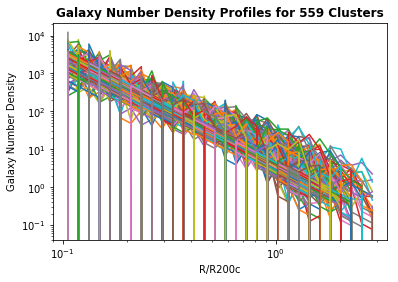

R_avg: 0.6310143672769238


Text(0, 0.5, 'dlog of Number Density')

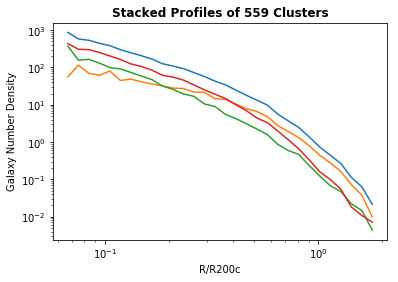

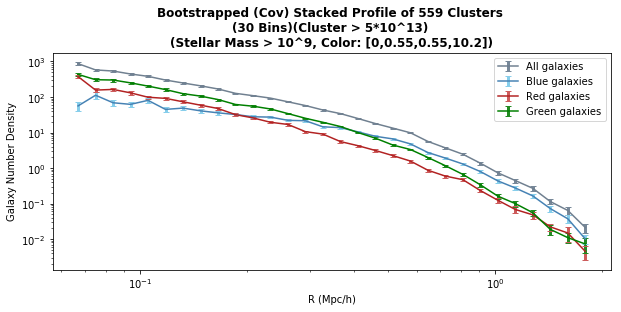

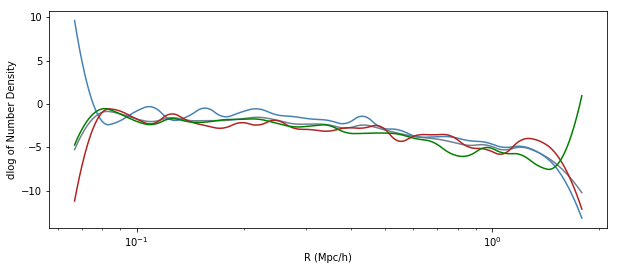

In [227]:
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass']/.704)>=((5*(10**3))))&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

bins = 30#30#15
Rmin = .1
Rmax = 3#5.5 # for R200c#7

NDensity_list = []
NDensity_list_b = []
NDensity_list_r = []
NDensity_list_g = []
ND_boot = []
ND_boot_b = []
ND_boot_r = []
ND_boot_g = []
RScale_list = []
Rmax_list = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]

mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)/0.704))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after first masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    mask_total = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > (10**9))
    print("N Subhalos after total masking:", len(subhalo_grp['SubhaloGrNr'][mask_total]))
    
    # COLOR CUTS
    mag = subhalo_grp['SubhaloStellarPhotometrics'][mask_total]
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalomass[mask_total])
    b1 = 0#.2
    b2 = 0.55#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    #print("sm=", sm)
    blue_mask_subs = (gmr>b1)&(gmr<b2)#(gmr<0.6)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)
    
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask_total]
    CM_halo = halo_grp['GroupCM'][h_i]
    
    print("len of all, blue, red:", len(CM_coords), len(CM_coords[blue_mask_subs]), len(CM_coords[red_mask_subs]), len(CM_coords[green_mask_subs]))

    # MAKING PROFILE
    #r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    redshift = header['Redshift']
    #H = cosmo.H(redshift)
    #conv_fac = 100/(H.value*1000)
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = CM_coords-CM_halo
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]/.704
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    Rmax_list.append(max(r_subhalo/RScale))

    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_blue = []
    NDensity_red = []
    NDensity_green = []
    galaxies = []
    galaxies_blue = []
    galaxies_red = []
    galaxies_green = []
    
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_blue = len(r_subhalo[mask_sep & blue_mask_subs])
        number_red = len(r_subhalo[mask_sep & red_mask_subs])
        number_green = len(r_subhalo[mask_sep & green_mask_subs])

        NDensity_blue.append(number_blue/volume)
        NDensity_red.append(number_red/volume)
        NDensity_green.append(number_green/volume)        
        galaxies_blue.append(number_blue)
        galaxies_red.append(number_red)
        galaxies_green.append(number_green)

    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)

        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    #print(r_stack)
    #bin_divided = np.linspace(.01,3,num=bins+1)
    #bin_stack = (bin_divided[1:]+bin_divided[:-1])/2
    #print(bin_stack)
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_b.append(NDensity_blue)
    NDensity_list_r.append(NDensity_red)
    NDensity_list_g.append(NDensity_green)

    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')
plt.show()

# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack = R_avg*(bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_b = np.mean(NDensity_list_b, axis=0)
NDensity_stack_r = np.mean(NDensity_list_r, axis=0)
NDensity_stack_g = np.mean(NDensity_list_g, axis=0)
plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.plot(bin_stack, NDensity_stack_b, '-')
plt.plot(bin_stack, NDensity_stack_r, '-')
plt.plot(bin_stack, NDensity_stack_g, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green, cov_green, boot_err_green = Bootstrap_Covariance(NDensity_list_g, 300, bins)
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack, (Yi_avg_green), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack, Yi_avg_red, yerr = boot_err_red, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('Bootstrapped (Cov) Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Stellar Mass > 10^9, Color: [%s,%s,%s,%s])' %(Number_of_halos, bins, b1, b2, r1, sm1), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')


Text(0, 0.5, 'dlog of Number Density')

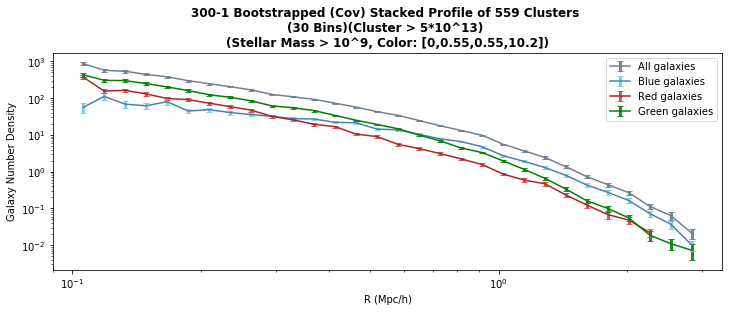

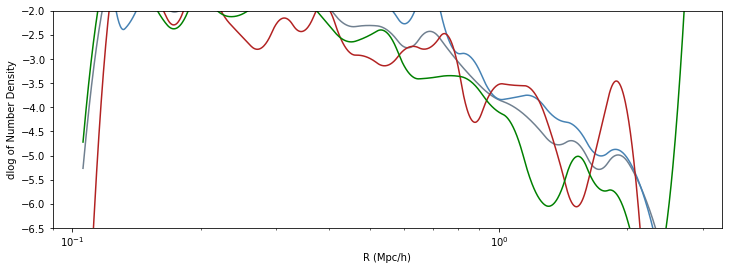

In [231]:
#Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
#Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
#Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
z = -2
bin_stack = bin_stack/R_avg
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack[:z], (Yi_avg_red[:z]), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack, (Yi_avg_green), 1000)  

#print(Yi_avg_red)
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(12,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack[:z], Yi_avg_red[:z], yerr = boot_err_red[:z], c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
#plt.plot(xx_fine, yy_fine, c = 'orange')
#plt.plot(xx_fine_b, yy_fine_b, c = 'orange')
#plt.plot(xx_fine_r, yy_fine_r, c = 'orange')
#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(.05,1.4)
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped (Cov) Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Stellar Mass > 10^9, Color: [%s,%s,%s,%s])' %(Number_of_halos, bins, b1, b2, r1, sm1), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
#dlog_data_SG_x, dlog_data_SG_y = get_slope_sg(bin_stack, (Yi_avg), 1000)  
#dlog_data_SG_x_b, dlog_data_SG_y_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
#dlog_data_SG_x_r, dlog_data_SG_y_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000)  
plt.figure(figsize = (12,4))#(6,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.ylim(-6.5,-2)
#plt.xlim(.6,1.2)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')

#print(len(r_subhalo),len(r_subhalo[blue_mask_subs]), len(r_subhalo[red_mask_subs]))
